In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [3]:
# Load the data
data = pd.read_csv('loan_data_nov2023.csv').drop('default',axis=1)

In [4]:
data.head(10)

,amount,interest,grade,years,ownership,income,age
0,5000,10.65,B,10.0,RENT,24000.0,33
1,2400,10.99,C,25.0,RENT,12252.0,31
2,10000,13.49,C,13.0,RENT,49200.0,24
3,5000,10.99,A,3.0,RENT,36000.0,39
4,3000,10.99,E,9.0,RENT,48000.0,24
5,12000,12.69,B,11.0,OWN,75000.0,28
6,9000,13.49,C,0.0,RENT,30000.0,22
7,3000,9.91,B,3.0,RENT,15000.0,22
8,10000,10.65,B,3.0,RENT,100000.0,28
9,1000,16.29,D,0.0,RENT,28000.0,22


In [5]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['grade', 'ownership'])

In [6]:
from sklearn.preprocessing import StandardScaler

# Assuming 'amount', 'interest', 'years', 'income', and 'age' are your numerical features
scaler = StandardScaler()
data_encoded[['amount', 'interest', 'years', 'income', 'age']] = scaler.fit_transform(data_encoded[['amount', 'interest', 'years', 'income', 'age']])

In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'amount' is your target variable
X = data_encoded.drop('amount', axis=1)
y = data_encoded['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

In [9]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.849555724030642


In [12]:
# Print coefficients and corresponding features
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

               Feature   Coefficient
0             interest  6.519709e-02
1                years  4.504584e-02
2               income  2.909918e-01
3                  age  5.248553e-03
4              grade_A  7.560412e+11
5              grade_B  7.560412e+11
6              grade_C  7.560412e+11
7              grade_D  7.560412e+11
8              grade_E  7.560412e+11
9              grade_F  7.560412e+11
10             grade_G  7.560412e+11
11  ownership_MORTGAGE  9.189059e+10
12     ownership_OTHER  9.189059e+10
13       ownership_OWN  9.189059e+10
14      ownership_RENT  9.189059e+10


In [13]:
r2 = r2_score(y_test, y_pred)

In [14]:
print(f'R2 score: {r2}')

R2 score: 0.15012496784163976


In [15]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [16]:
# Make predictions on the test set using lasso model
y_lasso_pred = lasso_model.predict(X_test)

In [17]:
# Make predictions on the test set using ridge model
y_ridge_pred=ridge_model.predict(X_test)

In [18]:
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
print(f'Mean Squared Error lasso: {mse_lasso}')
r2_lasso = r2_score(y_test, y_pred)
print(f'R2 score lasso: {r2_lasso}')

Mean Squared Error lasso: 0.8944995232974946
R2 score lasso: 0.15012496784163976


In [19]:
ridge_lasso = mean_squared_error(y_test, y_ridge_pred)
print(f'Mean Squared Error ridge: {ridge_lasso}')
r2_ridge = r2_score(y_test, y_ridge_pred)
print(f'R2 score ridge: {r2_ridge}')

Mean Squared Error ridge: 0.8495520157234714
R2 score ridge: 0.15012867754258896


In [20]:
# Calculate the correlation matrixdd
correlation_matrix = data_encoded.corr()

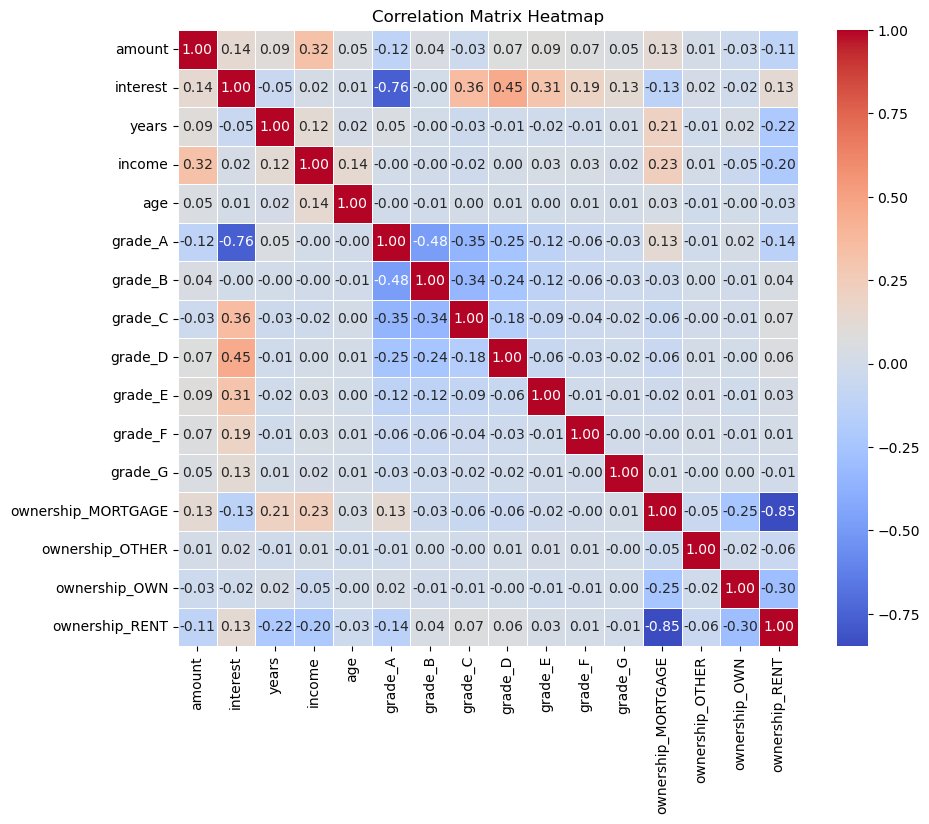

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()